# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge of Ridge and Lasso regression!

## Objectives

In this lab you will: 

- Use Lasso and Ridge regression with scikit-learn 
- Compare and contrast Lasso, Ridge and non-regularized regression 

## Housing Prices Data

Let's look at yet another house pricing dataset: 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at `.info()` of the data: 

In [2]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- First, split the data into `X` (predictor) and `y` (target) variables 
- Split the data into 75-25 training-test sets. Set the `random_state` to 10 
- Remove all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cont` and `X_test_cont`, respectively 

In [7]:
# Create X and y
y = df.SalePrice
X = df.drop(['SalePrice', 'Id'], axis=1)

In [139]:
def remove_columns_by_type(dt, dtype):
    not_dtype = dt.dtypes[dt.dtypes.values != dtype].index
    return not_dtype

In [140]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, random_state=10)

# Remove "object"-type features from X
cont_features = remove_columns_by_type(X, 'object')

# Remove "object"-type features from X_train and X_test
X_train_cont = X_train[cont_features]
X_test_cont = X_test[cont_features]

## Let's use this data to build a first naive linear regression model

- Fill the missing values in data using median of the columns (use [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)) 
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [141]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with median using SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train_cont)
X_train_imputed = pd.DataFrame(impute.transform(X_train_cont), columns=cont_features)
X_test_imputed = pd.DataFrame(impute.transform(X_test_cont), columns=cont_features)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train_imputed, y_train)

LinearRegression()

In [159]:
def print_metrics(observations, predictions):
    mse = mean_squared_error(observations, predictions)
    r2 = r2_score(observations, predictions)
    print('- MSE:', mse)
    print('- R-Squared:', r2)
    print()
    return mse, r2

In [143]:
# generate predictions for training & test sets
y_pred_train = linreg.predict(X_train_imputed)
y_pred_test = linreg.predict(X_test_imputed)

# Print metrics for training set
print("Training Set:")
print_metrics(y_train, y_pred_train)

# Print metrics for test set
print("Test Set:")
print_metrics(y_test, y_pred_test)

Training Set:
- MSE: 1173712195.5072715
- R-Squared: 0.8131421927426098

Test Set:
- MSE: 1475142062.4466474
- R-Squared: 0.8030090017771176



## Normalize your data

- Normalize your data using a `StandardScalar`  
- Fit a linear regression model to this data 
- Compute the R-squared and the MSE for both the training and test sets 


In [144]:
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
ss = StandardScaler().fit(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(ss.transform(X_train_imputed), columns=cont_features)
X_test_imputed_scaled = pd.DataFrame(ss.transform(X_test_imputed), columns=cont_features)

# Fit the model
linreg_norm = LinearRegression()
linreg_norm.fit(X_train_imputed_scaled, y_train)

# Generate predictions:
y_pred_train_scaled = linreg_norm.predict(X_train_imputed_scaled)
y_pred_test_scaled = linreg_norm.predict(X_test_imputed_scaled)

# Print metrics for training set
print("Training Set:")
print_metrics(y_train, y_pred_train_scaled)

# Print metrics for test set
print("Test Set:")
print_metrics(y_test, y_pred_test_scaled)

Training Set:
- MSE: 1173724960.128814
- R-Squared: 0.8131401605841292

Test Set:
- MSE: 1474442758.7329516
- R-Squared: 0.8031023870449701



## Include categorical variables

The above models didn't include categorical variables so far, let's include them! 


- Include all columns of `object` type from `X_train` and `X_test` and assign them to `X_train_cat` and `X_test_cat`, respectively 
- Fill missing values in all these columns with the string `'missing'` 

In [145]:
# Create X_cat which contains only the categorical variables
features_cat = list(set(X.columns) - set(cont_features))
X_train_cat = X_train[features_cat]
X_test_cat = X_test[features_cat]

# Fill missing values with the string 'missing'
X_train_cat.fillna('missing', inplace=True)
X_test_cat.fillna('missing', inplace=True)

- One-hot encode all these categorical columns using `OneHotEncoder` 
- Transform the training and test DataFrames (`X_train_cat`) and (`X_test_cat`) 
- Run the given code to convert these transformed features into DataFrames 

In [146]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables fitted to training set
ohe = OneHotEncoder(drop='first').fit(X_train_cat)

# Transform both training & test sets:
X_train_ohe = ohe.transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

# Convert these columns into a DataFrame
columns = ohe.get_feature_names(X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

- Combine `X_train_imputed_scaled` and `cat_train_df` into a single DataFrame  
- Similarly, combine `X_test_imputed_scaled` and `cat_test_df` into a single DataFrame 

In [148]:
# Your code here
X_train_all = pd.concat([X_train_imputed_scaled, cat_train_df], axis=1)
X_test_all = pd.concat([X_test_imputed_scaled, cat_test_df], axis=1)

Now build a linear regression model using all the features (`X_train_all`). Also, print the R-squared and the MSE for both the training and test sets. 

In [188]:
# Fit the model
linreg_all = LinearRegression().fit(X_train_all, y_train)

# Generate predictions for both training & test sets
y_train_pred_all = linreg_all.predict(X_train_all)
y_test_pred_all = linreg_all.predict(X_test_all)

# print out metrics (MSE & R2) for both training & test sets
# Training
print("Training Set:")
linreg_metrics_train = print_metrics(y_train, y_train_pred_all)

# Test
print("Test Set:")
linreg_metrics_test = print_metrics(y_test, y_test_pred_all)

Training Set:
- MSE: 415430938.3489134
- R-Squared: 0.9338623944576052

Test Set:
- MSE: 846798095.9244462
- R-Squared: 0.8869182796315077



Notice the severe overfitting above; our training R-squared is very high, but the test R-squared is negative! Similarly, the scale of the test MSE is orders of magnitude higher than that of the training MSE.

## Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables, `X_train_all`) to build two models - one each for Lasso and Ridge regression. Each time, look at R-squared and MSE. 

In [151]:
from sklearn.linear_model import Lasso, Ridge

## Lasso

#### With default parameter (alpha = 1)

In [191]:
# Your code here
lasso_1 = Lasso()
lasso_1.fit(X_train_all, y_train)

y_pred_train_lasso = lasso_1.predict(X_train_all)
y_pred_test_lasso = lasso_1.predict(X_test_all)

# print out metrics (MSE & R2) for both training & test sets
# Training
print("Training Set:")
lasso_train_metrics_1 = print_metrics(y_train, y_pred_train_lasso)

# Test
print("Test Set:")
lasso_test_metrics_1 = print_metrics(y_test, y_pred_test_lasso)

Training Set:
- MSE: 416348842.23208976
- R-Squared: 0.9337162619495339

Test Set:
- MSE: 846479932.0792089
- R-Squared: 0.8869607673451099



#### With a higher regularization parameter (alpha = 10)

In [192]:
# Your code here
lasso_10 = Lasso(alpha=10)
lasso_10.fit(X_train_all, y_train)

y_pred_train_lasso = lasso_10.predict(X_train_all)
y_pred_test_lasso = lasso_10.predict(X_test_all)

# print out metrics (MSE & R2) for both training & test sets
# Training
print("Training Set:")
lasso_train_metrics_10 = print_metrics(y_train, y_pred_train_lasso)

# Test
print("Test Set:")
lasso_test_metrics_10 = print_metrics(y_test, y_pred_test_lasso)

Training Set:
- MSE: 449005105.0291533
- R-Squared: 0.9285173062917178

Test Set:
- MSE: 858590507.9739647
- R-Squared: 0.885343516711903



## Ridge

#### With default parameter (alpha = 1)

In [193]:
# Your code here
ridge_1 = Ridge()
ridge_1.fit(X_train_all, y_train)

y_pred_train_ridge = ridge_1.predict(X_train_all)
y_pred_test_ridge = ridge_1.predict(X_test_all)

# print out metrics (MSE & R2) for both training & test sets
# Training
print("Training Set:")
ridge_train_metrics_1 = print_metrics(y_train, y_pred_train_ridge)

# Test
print("Test Set:")
ridge_test_metrics_1 = print_metrics(y_test, y_pred_test_ridge)

Training Set:
- MSE: 538795298.1654778
- R-Squared: 0.914222491372955

Test Set:
- MSE: 911378520.968107
- R-Squared: 0.8782941865906594



#### With default parameter (alpha = 10)

In [194]:
# Your code here
# Your code here
ridge_10 = Ridge(alpha=10)
ridge_10.fit(X_train_all, y_train)

y_pred_train_ridge = ridge_10.predict(X_train_all)
y_pred_test_ridge = ridge_10.predict(X_test_all)

# print out metrics (MSE & R2) for both training & test sets
# Training
print("Training Set:")
ridge_train_metrics_10 = print_metrics(y_train, y_pred_train_ridge)

# Test
print("Test Set:")
ridge_test_metrics_10 = print_metrics(y_test, y_pred_test_ridge)

Training Set:
- MSE: 648599755.0834851
- R-Squared: 0.8967413574754582

Test Set:
- MSE: 959213575.4773935
- R-Squared: 0.8719062763156304



## Compare the metrics    

Write your conclusions here: 
_________________________________


In [190]:
print('Regression\talpha\t\tSet\t\tMSE\t\t\tR-Squared')
print(f'Linear\t\tn/a\t\tTraining\t{linreg_metrics_train[0]}\t{linreg_metrics_train[1]}')
print(f'Linear\t\tn/a\t\tTest\t\t{linreg_metrics_test[0]}\t{linreg_metrics_test[1]}')
print()
print(f'Lasso\t\t1\t\tTraining\t{lasso_train_metrics_1[0]}\t{lasso_train_metrics_1[1]}')
print(f'Lasso\t\t1\t\tTest\t\t{lasso_test_metrics_1[0]}\t{lasso_test_metrics_1[1]}')
print()
print(f'Lasso\t\t10\t\tTraining\t{lasso_train_metrics_10[0]}\t{lasso_train_metrics_10[1]}')
print(f'Lasso\t\t10\t\tTest\t\t{lasso_test_metrics_10[0]}\t{lasso_test_metrics_10[1]}')
print()
print(f'Ridge\t\t1\t\tTraining\t{ridge_train_metrics_1[0]}\t{ridge_train_metrics_1[1]}')
print(f'Ridge\t\t1\t\tTest\t\t{ridge_test_metrics_1[0]}\t{ridge_test_metrics_1[1]}')
print()
print(f'Ridge\t\t10\t\tTraining\t{ridge_train_metrics_10[0]}\t{ridge_train_metrics_10[1]}')
print(f'Ridge\t\t10\t\tTest\t\t{ridge_test_metrics_10[0]}\t{ridge_test_metrics_10[1]}')

Regression	alpha		Set		MSE			R-Squared
Linear		n/a		Training	415430938.3489134	0.9338623944576052
Linear		n/a		Test		846798095.9244462	0.8869182796315077

Lasso		1		Training	416348842.23208976	0.9337162619495339
Lasso		1		Test		846479932.0792089	0.8869607673451099

Lasso		10		Training	449005105.0291533	0.9285173062917178
Lasso		10		Test		858590507.9739647	0.885343516711903

Ridge		1		Training	538795298.1654778	0.914222491372955
Ridge		1		Test		911378520.968107	0.8782941865906594

Ridge		10		Training	648599755.0834851	0.8967413574754582
Ridge		10		Test		959213575.4773935	0.8719062763156304


Between Ridge and Lasso, Lasso seems to be performing better with a test R-Squared of 0.8869607673451099 at alpha = 1, compared to the Ridge's R-Squared of 0.8782941865906594 at the same alpha. 

However, if we're using Linear Regression model without regularization as baseline, only R-squared of Lasso at alpha = 1 is higher. 

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

Use 10**(-10) as an estimate that is very close to 0. 

In [208]:
thresh = 10**(-10)

In [214]:
# Number of Ridge params almost zero
print('alpha = 1:')
print(sum(np.abs(ridge_1.coef_) < thresh))

print('alpha = 10:')
print(sum(np.abs(ridge_10.coef_) < thresh))

alpha = 1:
0
alpha = 10:
0


In [215]:
# Number of Lasso params almost zero
print('alpha = 1:')
print(sum(np.abs(lasso_1.coef_) < thresh))

print('alpha = 10:')
print(sum(np.abs(lasso_10.coef_) < thresh))

alpha = 1:
8
alpha = 10:
49


In [210]:
print(len(lasso_10.coef_))
print(sum(abs(lasso_10.coef_) < 10**(-10)) / len(lasso_10.coef_))

261
0.18773946360153257


Lasso was very effective to essentially perform variable selection and remove about 25% of the variables from your model!

--> My version of Lasso only removes around 18% of the variables

Overall my models generate slightly different metrics compared to the solution. This could be due to:
- The solution keeps `'Id'` column in X, which I do not think is the accurate way to handle 'ID' columns in general.
- OneHotEncoder of the solution does not drop one of the values

## Put it all together

To bring all of our work together lets take a moment to put all of our preprocessing steps for categorical and continuous variables into one function. This function should take in our features as a dataframe `X` and target as a Series `y` and return a training and test DataFrames with all of our preprocessed features along with training and test targets. 

In [218]:
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test DataFrames with targets'''
    
    # Train-test split (75-25), set seed to 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    
    # Remove "object"-type features and SalesPrice from X
    cont_features = remove_columns_by_type(X, 'object')
    # Remove "object"-type features from X_train and X_test
    X_train_cont = X_train[cont_features]
    X_test_cont = X_test[cont_features]

    
    # Impute missing values with median using SimpleImputer
    impute = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train_cont)
    X_train_imputed = pd.DataFrame(impute.transform(X_train_cont), columns=cont_features)
    X_test_imputed = pd.DataFrame(impute.transform(X_test_cont), columns=cont_features)


    # Scale the train and test data
    ss = StandardScaler().fit(X_train_imputed)
    X_train_imputed_scaled = pd.DataFrame(ss.transform(X_train_imputed), columns=cont_features)
    X_test_imputed_scaled = pd.DataFrame(ss.transform(X_test_imputed), columns=cont_features)


    # Create X_cat which contains only the categorical variables
    features_cat = list(set(X.columns) - set(cont_features))
    X_train_cat = X_train[features_cat]
    X_test_cat = X_test[features_cat]


    # Fill nans with a value indicating that that it is missing
    X_train_cat.fillna('missing', inplace=True)
    X_test_cat.fillna('missing', inplace=True)


    # OneHotEncode Categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore').fit(X_train_cat)
    
    # Transform both training & test sets:
    X_train_ohe = ohe.transform(X_train_cat)
    X_test_ohe = ohe.transform(X_test_cat)
    
    # Convert these columns into a DataFrame
    columns = ohe.get_feature_names(X_train_cat.columns)
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)

    
    # Combine categorical and continuous features into the final dataframe
    X_train_all = pd.concat([X_train_imputed_scaled, cat_train_df], axis=1)
    X_test_all = pd.concat([X_test_imputed_scaled, cat_test_df], axis=1)
    
    return X_train_all, X_test_all, y_train, y_test

### Graph the training and test error to find optimal alpha values

Earlier we tested two values of alpha to see how it effected our MSE and the value of our coefficients. We could continue to guess values of alpha for our Ridge or Lasso regression one at a time to see which values minimize our loss, or we can test a range of values and pick the alpha which minimizes our MSE. Here is an example of how we would do this:  

In [219]:
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)

Optimal Alpha Value: 40


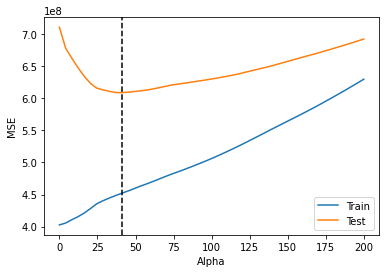

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

Take a look at this graph of our training and test MSE against alpha. Try to explain to yourself why the shapes of the training and test curves are this way. Make sure to think about what alpha represents and how it relates to overfitting vs underfitting.

## Summary

Well done! You now know how to build Lasso and Ridge regression models, use them for feature selection and find an optimal value for $\text{alpha}$. 